<a href="https://colab.research.google.com/github/Pratichhya/AI-and-Machine-Learning-workshop-in-Paschimanchal-Campus/blob/master/biais_variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goodness of a fit 
==========
This notebook illustrates different aspects of the goodness of a fit (bias-variance tradeoff, and over or under-fitting) by using [the polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression) in the context of one explanatory variables.  
We briefly describe hereafter the theory of the polynomial regresion.

Polynomial regression
----------
We are looking at explaining or predicting $y$ from only one explanatory variable $x$. For example, a quadratic regression model estimates $y$ by using the following  function $f$:
  $$y\approx f(x)=a_0\times 1 + a_1\times x + a_2\times x^2$$
where $(a,b,c)$ are the trainable parameters. The function $f$ is thus a linear combination of the following basic functions of $x$: $(1,x,x^2)$.  

The Figure below displays curves for different values of $(a,b,c)$ parameters.

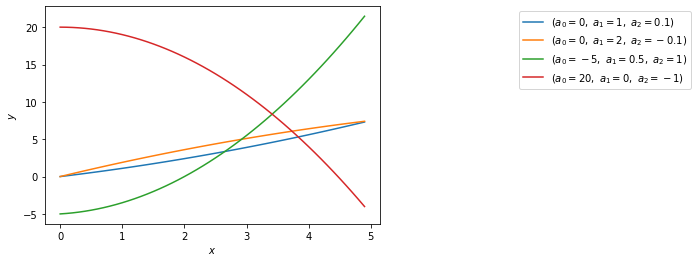

In [5]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy

# Generate points between (0,5)
x = numpy.arange(0., 5., 0.1)

def makelabel(a,b,c):
    return r'$(a_0=' + str(a0) + ',\ a_1=' + str(a1) + ',\ a_2=' + str(a2) + ')$'       # for printing label box next to the graph

# Curves for different value parameters
[a0,a1,a2]  = [0,1,0.1]
pl.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
[a0,a1,a2]  = [0,2,-0.1]
pl.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
[a0,a1,a2]  = [-5,0.5,1]
pl.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
[a0,a1,a2]  = [20,0,-1]
pl.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
pl.legend(bbox_to_anchor=(1.4, 1.0))
pl.ylabel(r'$y$')
pl.xlabel(r'$x$')
pl.show()

In the case of a polynomial regression of degree $n$ (also named *order*), we search for $n+1$ coefficients such as
$$y\approx f(x) = a_0 + a_1x + a_2x^2 + \cdots a_nx_n = \sum_{i=0}^n a_ix^i $$

# Construction of a synthetic dataset
We construct here a synthetic dataset for which we know the function that allows us to generate new data.
The advantage of synthetic dataset is to control the different setting such as the number of (training and testing) examples, and the degree of the polynomial functions.

## Setting
The dataset has several characteristics including the number of observations, the function $f$ to generate new data, the level of noise, or the minimum and maximum values for the display.

The values of $x$ are selected at random in the following ranges for a given number of examples:
+ *rd.xmin* : minimum for $x$ from the "regressiondemo.py" library, set to 0
+ *rd.xmax* : maximum for $x$ from the "regressiondemo.py" library, set to 10
+ *m* : number of points/observations, defined locally in the notebook

The values of $y$ depends on the "true" function $f$ and the level of noise:
+ *truefunc()* : the "true" function $f$ that generates the data, defined locally in the notebook
+ *sigma* : the standard-deviation of the noise, defined locally in the notebook

For the display, $y$ values are restrained to 
+ *ydisplaymin* : minimum of $y$, defined locally in the notebook
+ *ydisplaymax* : maximum of $y$, defined locally in the notebook

## Step 1.1: generation of non-noisy data
First, we generate non-noisy data. Observations follows perfectly the funciton $f$. The function $f$, the number of observations (traning data), and the noise level can be modified in the following cells.

In [24]:
from google.colab import  files
src = list(files.upload().values())[0]
open('regressiondemo.py','wb').write(src)
import regressiondemo as rd

Saving regressiondemo.py to regressiondemo.py


In [28]:
# import
%matplotlib inline
import matplotlib.pyplot as pl
import sys
import os
#  import refressiondemo
sys.path.append(os.getcwd())
# import regressiondemo as rd

In [29]:
##############################
#      Setting
#=======================
# The true function (f(x))
def truefunc(x):
    return numpy.sin(x*2.0)*numpy.sqrt(x)/3.3

#  for the display
ydisplaymin = -1.8
ydisplaymax = 1.8

#  do not test for m>100 (O(m^3))
m = 60          #it referes to number of observations

# generate a vector x (at random)
x = rd.makeX(m)
# true y values
yt = truefunc(x)

# generate xts and yts for the dispaly (strong point density)
xts = rd.makeX(200,uniform=True)
yts = truefunc(xts)

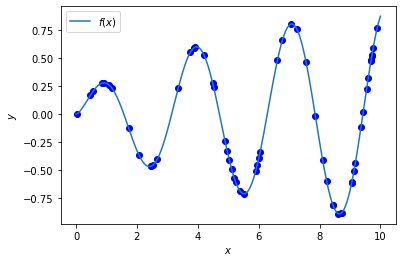

In [31]:
# Figure
pl.plot(x, yt, 'bo')      #plotting generated vector x against true y obtained from true function
pl.plot(xts, yts,label = r'$f(x)$')  #plotting xts generated by rd file against yts that is received similar way to previous with true function
pl.ylabel(r'$y$')
pl.xlabel(r'$x$')
pl.legend()
pl.show()

## Step 1.2:  Adding some noise
To get more real data, a commonly used approach consists in adding some noise to $y$.
Here, we add a Gaussian noise (standard deviation *sigma*).

What does represent the figure below?

In [54]:
#  noise level
rd.setSigma(0.002)
#  Add Gaussian noise
y = rd.addNoise(yt,laplace=True)

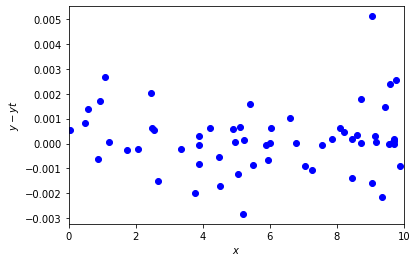

In [55]:
pl.plot(x, y-yt, 'bo') 
pl.ylabel(r'$y-yt$')
pl.xlabel(r'$x$')
pl.xlim(rd.xmin,rd.xmax)
pl.show()

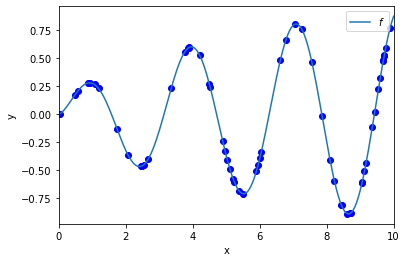

In [56]:
# Data
pl.plot(x, y, 'bo') 
pl.ylabel('y')
pl.xlabel('x')
pl.xlim(rd.xmin,rd.xmax)
pl.plot(xts, yts,label = r'$f$')
pl.legend()

# Polynomial regression
We will use the polynomial regression function of Numpy: *np.polyfit()*.  
This determines the parameter $a_i$ ($1\le i \le n$), where $n$ is the degree of the polynomial function, which minimise the quadratic cost (same cost than for the linear regression):
  $$\sum_{i=1}^m (y_i-f(x_i))^2 $$

Here, we do not have interest in the optimisation algorithm (we could use for example the gradient descent algorithm).

## Step 1.3: polynomial regression
Let us try first we a polynom of order 4.
Please note that the thick blue line is $f$, whereas the green curve (thiner) corresponds to the learned model $\hat{f}$.

In [61]:
##############################
#      Setting
#      =======================
#     change the *order* value to test for polynoms of different degrees
order = 10
##############################

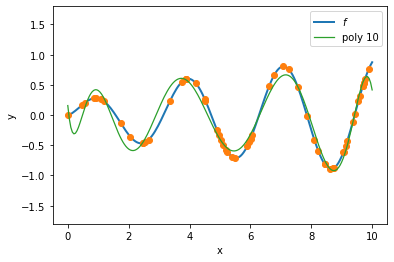

In [62]:
# plot data and the truth
pl.plot(xts, yts,label = r'$f$', linewidth=2) 
pl.plot(x, y, 'o') 
pl.ylabel('y')
pl.xlabel('x')

#  build the fitted poly curve (xts,ys) from order-th regression
ys = rd.linReg(x,y,xts,order)

#  plot fitted curve
pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )  
pl.ylim(ydisplaymin,ydisplaymax)
pl.legend()

The polynomial functions of low degree do not work very well to explain our complex $f$ function.

## Step 1.4: on a mystery function
Here we generate new data. The function *rd.demoReg1()* defines its own function $f$ to generate data.

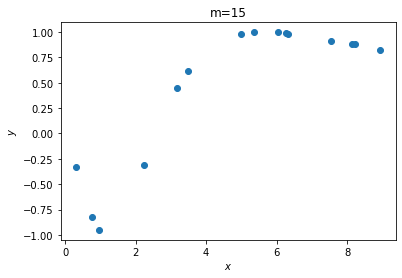

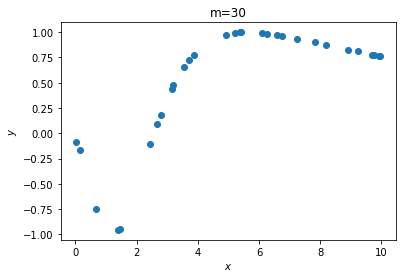

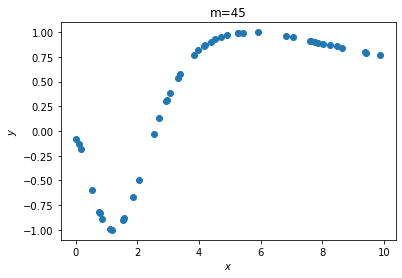

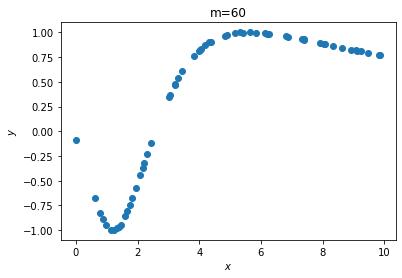

In [68]:
#increasing dataset
m = [15,30,45,60]
for m in m:       #loop for different number of points
  pl.figure()
  x,y = rd.demoReg1(m)
  pl.plot(x, y, 'o') 
  pl.ylabel(r'$y$')
  pl.xlabel(r'$x$')
  pl.title("m="+str(m))

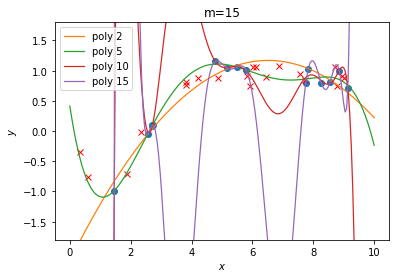

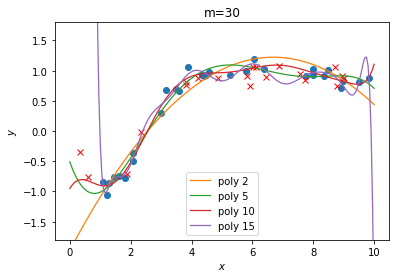

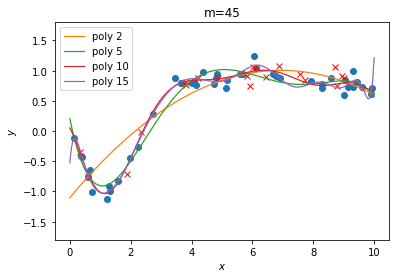

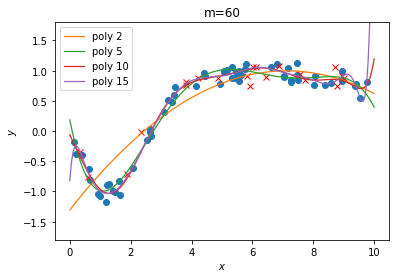

In [76]:
##############################
#      Setting
#      =======================
#     # observations/points
m = [15,30,45,60]    #taking for several range of data points
order_all=[2,5,10,15]    # changing the *order* value to test polynomial functions of different degrees
##############################
rd.setSigma(0.1)
# plot
xtest,ytest=rd.demoReg1(20)         #for testing effect of noise in the dataset
for m in m:       #loop for different number of points
  pl.figure()
  x,y = rd.demoReg1(m)
  pl.plot(x, y, 'o') 
  pl.plot(xtest,ytest,"rx")
  pl.ylabel(r'$y$')
  pl.xlabel(r'$x$')
  pl.title("m="+str(m))

  for order in order_all:     #loop for different degrees
    ys=rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )  
    pl.ylim(ydisplaymin,ydisplaymax)
    pl.legend()

Test for different quantity of training data ($m$) and different polynomial functions (*order*), and different noise.

Display the different figures, and **comment** them.

**Based on order:** From my graphs obtained above, I can see that for several number of data points, model with order 5,6 and 10 are better (also high variance less bias) than that for order 2(more bias and less variance). But, as we discussed the higher we make the order for the model, more complex it will be though will fit the model well. In the above setup, I think model will polynomial order of 6 is best to use.

**Based on number of data points:** When plotting thee data across increasing set of data leads to decrease variance that helps me in saying decrease in variance leads to increase the bias.

**Based on noise:** When noise was set for 0.002 it was overfitting the data while when I set it for 1 it was underfitting and the above graph was obtained when setting noise value for 0.1. So in case of underfitting I can say there is low variance but high bias whereas in case of overfitting it was high variance and low bias.

```
Thank you
```